## Template Matching with Single Object

(52, 40, 3)
(3, 40, 52)
cv2.TM_CCOEFF 4


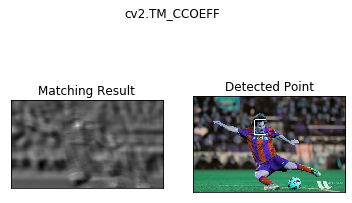

cv2.TM_CCOEFF_NORMED 5


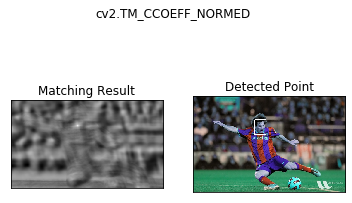

cv2.TM_CCORR 2


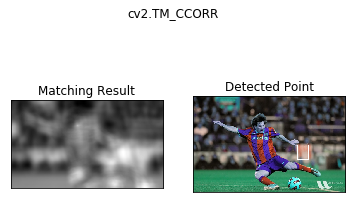

cv2.TM_CCORR_NORMED 3


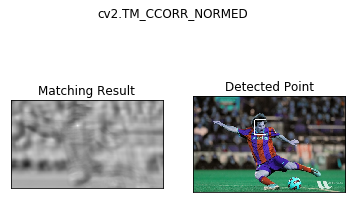

cv2.TM_SQDIFF 0


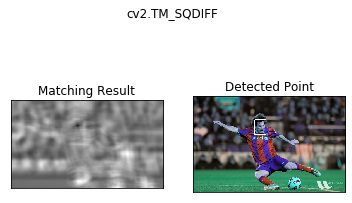

cv2.TM_SQDIFF_NORMED 1


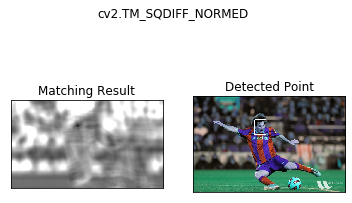

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

template_filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\messi_face.jpg"
input_filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\messi.png"

template = cv2.imread(template_filepath)
input_image = cv2.imread(input_filepath)
img2 = input_image.copy()

w = template.shape[1]
h = template.shape[0]

#(w,h) = template.shape[::-1]

print(template.shape)
print(template.shape[::-1])

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    input_image = img2.copy()
    method = eval(meth)
    print(meth , method)
    
    match = cv2.matchTemplate(input_image,template,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(match)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv2.rectangle(input_image,top_left,bottom_right,(255,255,255),2)
    cv2.imshow("Messi" , input_image)
    
    k = cv2.waitKey(1)  
    if k == 27:
        break
    
    plt.subplot(121)
    plt.imshow(match,cmap = 'gray')
    plt.title('Matching Result')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(input_image,cmap = 'gray')
    plt.title('Detected Point')
    plt.xticks([])
    plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()
    
cv2.waitKey(0)
cv2.destroyAllWindows()